In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# amount of corners in pattern
nx = 6
ny = 9

images = glob.glob('camera_cal/calibration*.jpg')

objpoints = []
imgpoints = []

# Prepare object points
objp = np.zeros((nx * ny, 3), np.float32)
objp[:, :2] = np.mgrid[0:ny, 0:nx].T.reshape(-1, 2)

for fname in images:
    # Read images
    img = cv2.imread(fname)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        # Draw and display the corners
        # cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        # plt.imshow(img)

# Obtain calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objectPoints=objpoints, imagePoints=imgpoints,
    imageSize=gray.shape[::-1], cameraMatrix=None,distCoeffs=None)

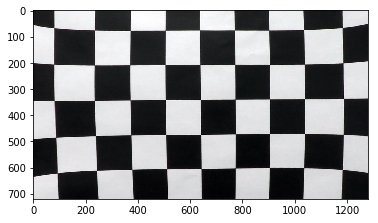

In [3]:
# Undistort an image
img = cv2.imread(images[0])
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite(filename='output_images/calibration1_undistorted.jpg', img=dst)
plt.imshow(dst)

In [4]:
import pickle
# Save calibration to file
calibration = {'mtx':mtx,
               'dist':dist,
               'rvecs':rvecs,
               'tvecs':tvecs}

with open('camera_cal/calibration.p', 'wb') as file:
    pickle.dump(obj=calibration, file=file)